# Krzysztof Nalepa
## Sprawozdanie z ćwiczenia 6


### Zadanie 1:
Zaimplementuj 3 podstawowe algorytmy całkowania:

* wzór prostokątów,
* wzór trapezów
* wzór Simpsona


In [0]:
def rectangular_integration(function, a, b, i):
  dx = (b - a) / i
  start = a + (dx / 2)
  sum = 0

  for x in range(i):
    sum += function(start + x * dx) * dx
  return sum

def trapeze_integration(function, a, b, i):
  dx = (b - a) / i
  sum = 0

  for x in range(i):
    sum += (function(a + x * dx) + function(a + (x + 1) * dx)) / 2 * dx
  return sum


def simpson_integration(function, a, b, i):
  dx = (b - a) / i
  start = a + (dx / 2)
  sum = 0
  for x in range(i):
    sum += dx / 6 * (function(a + x * dx) + 4 * function(start + x * dx) + function(a + (x + 1) * dx))
  return sum

### Zadanie 2:
Przetestuj działanie algorytmów dla różnych funkcji (zwizualizuj te funkcje!):

* $f(x) = x$
* $f(x) = 2 * x^2$
* $f(x) = 4*sin(x)$
* $f(x) = e^x$
* $f(x) = x*sin^2(x)+2*cos(x)$
* $f(x) = cos(\frac{(x+1)}{(x^2+0.04)})*e^x$

Oblicz dokładne wartości całek oznaczonych!. 

Sprawdź zachowanie implementacji dla kilku różnych przedziałów całkowania (min. 3)

Sprawdź różnice w dokładności dla różnych wartości kroków całkowania (min. 3)

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from tabulate import tabulate

f1 = lambda x: x
f2 = lambda x: 2 * x ** 2
f3 = lambda x: 4 * math.sin(x)
f4 = lambda x: math.exp(x)
f5 = lambda x: x * math.sin(x) ** 2 + 2 * math.cos(x)
f6 = lambda x: math.cos((x + 1) / (x ** 2 + 0.04)) * math.exp(x)

def show_charts(function, a, b, i, function_name):
  domain = np.linspace(a, b, i)
  values = np.vectorize(function)(domain)
  plt.plot(domain, values, label = function_name)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(function_name)
  plt.legend()
  plt.show()

def calculate_integral(function, a, b, i, function_name):
  show_charts(function, a, b, i, function_name)
  rec_value = rectangular_integration(function, a, b, i)
  trap_value = trapeze_integration(function, a, b, i)
  simpson_value = simpson_integration(function, a, b, i)

  scipy_value = integrate.quad(function, a, b)[0]
  
  table = [
           ["Rectangular integration", rec_value, scipy_value, abs(rec_value - scipy_value) / abs(scipy_value)],
           ["Trapezoidal integration", trap_value, scipy_value, abs(trap_value - scipy_value) / abs(scipy_value)],
           ["Simpson integration",   simpson_value,  scipy_value, abs(simpson_value - scipy_value) / abs(scipy_value)]
  ]

  print(tabulate(table, headers=['method', 'value', 'scipy value', 'realtive error'], floatfmt=".10f"))

def calculate(a, b, i):
  calculate_integral(f1, a, b, i, "f(x) = x")
  calculate_integral(f2, a, b, i, "f(x) = 2 * x^2")
  calculate_integral(f3, a, b, i, "f(x) = 4*sin(x)")
  calculate_integral(f4, a, b, i, "f(x) = e^x")
  calculate_integral(f5, a, b, i, "f(x) = x*sin^2(x)+2*cos(x)")
  calculate_integral(f6, a, b, i, "cos((x + 1) / (x^2 + 0.04)) * e^x")


#### Różne przedziały dla liczby kroków 100

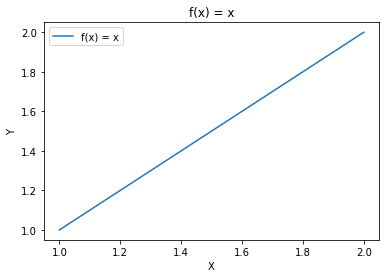

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  1.5000000000   1.5000000000      0.0000000000
Trapezoidal integration  1.5000000000   1.5000000000      0.0000000000
Simpson integration      1.5000000000   1.5000000000      0.0000000000


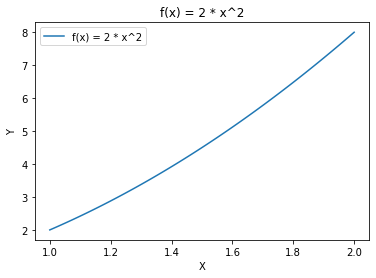

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  4.6666500000   4.6666666667      0.0000035714
Trapezoidal integration  4.6667000000   4.6666666667      0.0000071429
Simpson integration      4.6666666667   4.6666666667      0.0000000000


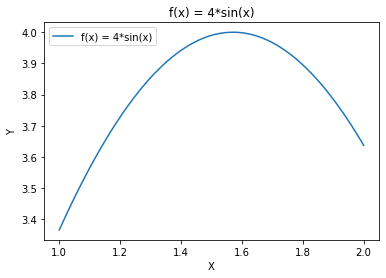

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  3.8258125105   3.8257965697      0.0000041667
Trapezoidal integration  3.8257646880   3.8257965697      0.0000083333
Simpson integration      3.8257965697   3.8257965697      0.0000000000


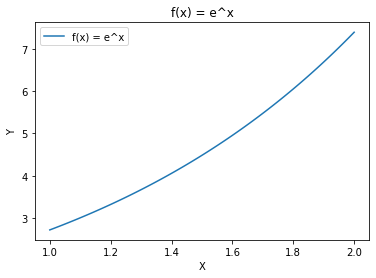

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  4.6707548090   4.6707742705      0.0000041667
Trapezoidal integration  4.6708131935   4.6707742705      0.0000083333
Simpson integration      4.6707742705   4.6707742705      0.0000000000


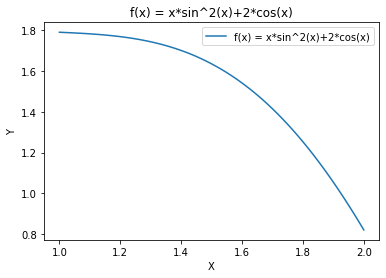

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  1.5210757524   1.5210655864      0.0000066834
Trapezoidal integration  1.5210452546   1.5210655864      0.0000133668
Simpson integration      1.5210655865   1.5210655864      0.0000000000


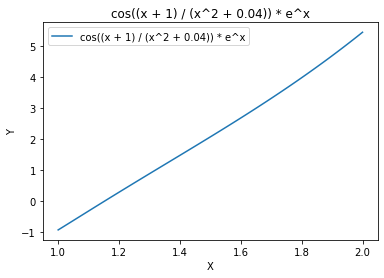

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  2.1248216532   2.1248293029      0.0000036002
Trapezoidal integration  2.1248446032   2.1248293029      0.0000072007
Simpson integration      2.1248293032   2.1248293029      0.0000000001


In [46]:
calculate(1, 2, 100)

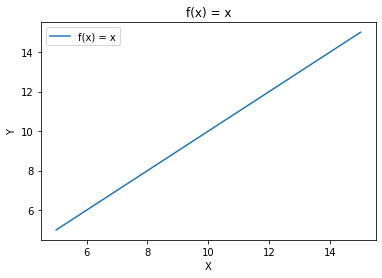

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  100.0000000000  100.0000000000      0.0000000000
Trapezoidal integration  100.0000000000  100.0000000000      0.0000000000
Simpson integration      100.0000000000  100.0000000000      0.0000000000


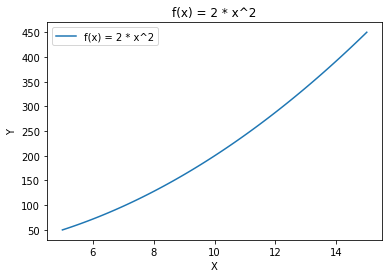

method                             value      scipy value    realtive error
-----------------------  ---------------  ---------------  ----------------
Rectangular integration  2166.6500000000  2166.6666666667      0.0000076923
Trapezoidal integration  2166.7000000000  2166.6666666667      0.0000153846
Simpson integration      2166.6666666667  2166.6666666667      0.0000000000


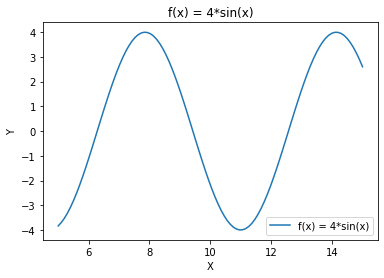

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  4.1751398174   4.1734003933      0.0004167882
Trapezoidal integration  4.1699219799   4.1734003933      0.0008334723
Simpson integration      4.1734005382   4.1734003933      0.0000000347


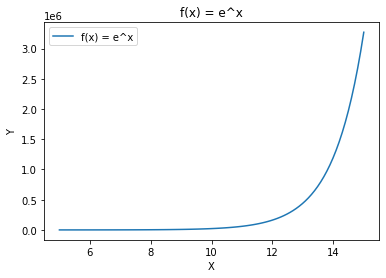

method                                value         scipy value    realtive error
-----------------------  ------------------  ------------------  ----------------
Rectangular integration  3267507.3277336499  3268868.9593130094      0.0004165452
Trapezoidal integration  3271592.5628775968  3268868.9593130094      0.0008331945
Simpson integration      3268869.0727816322  3268868.9593130094      0.0000000347


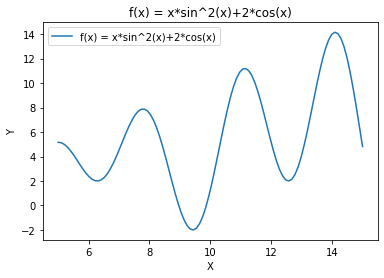

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  56.1259478369  56.1193510590      0.0001175491
Trapezoidal integration  56.1061635085  56.1193510590      0.0002349911
Simpson integration      56.1193530608  56.1193510590      0.0000000357


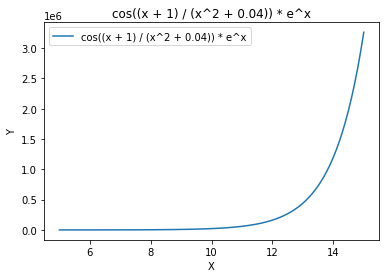

method                                value         scipy value    realtive error
-----------------------  ------------------  ------------------  ----------------
Rectangular integration  3257724.2524859719  3259082.9315828709      0.0004168900
Trapezoidal integration  3261800.6296177260  3259082.9315828709      0.0008338843
Simpson integration      3259083.0448632231  3259082.9315828709      0.0000000348


In [47]:
calculate(5, 15, 100)

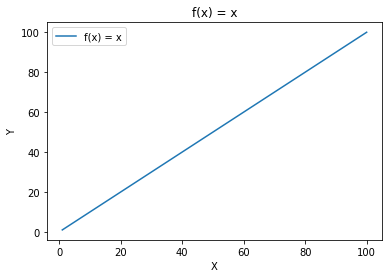

method                             value      scipy value    realtive error
-----------------------  ---------------  ---------------  ----------------
Rectangular integration  4999.5000000000  4999.5000000000      0.0000000000
Trapezoidal integration  4999.5000000000  4999.5000000000      0.0000000000
Simpson integration      4999.5000000000  4999.5000000000      0.0000000000


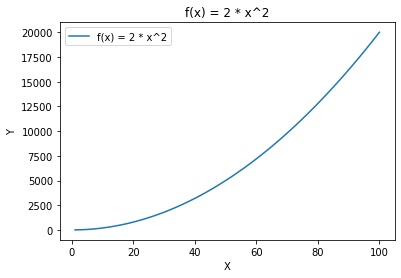

method                               value        scipy value    realtive error
-----------------------  -----------------  -----------------  ----------------
Rectangular integration  666649.8283500003  666666.0000000000      0.0000242575
Trapezoidal integration  666698.3432999999  666666.0000000000      0.0000485150
Simpson integration      666666.0000000002  666666.0000000000      0.0000000000


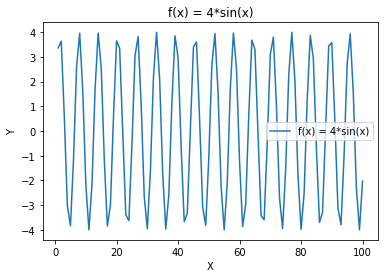

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  -1.3422111975  -1.2880662657      0.0420358279
Trapezoidal integration  -1.1811038558  -1.2880662657      0.0830410769
Simpson integration      -1.2885087503  -1.2880662657      0.0003435263


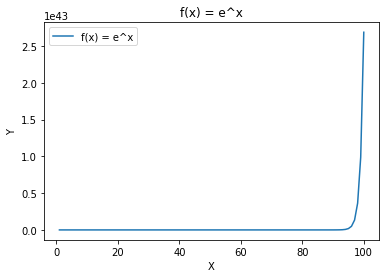

method                                                                     value                                              scipy value    realtive error
-----------------------  -------------------------------------------------------  -------------------------------------------------------  ----------------
Rectangular integration  25814001515051798582295449815491229725491200.0000000000  26881171418161316480172143303794106782711808.0000000000      0.0396995312
Trapezoidal integration  29041644176468225140950221821706028003098624.0000000000  26881171418161316480172143303794106782711808.0000000000      0.0803712281
Simpson integration      26889882402190610736353811911910228882358272.0000000000  26881171418161316480172143303794106782711808.0000000000      0.0003240552


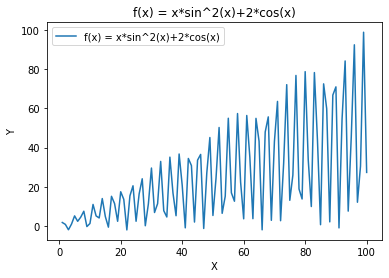

method                             value      scipy value    realtive error
-----------------------  ---------------  ---------------  ----------------
Rectangular integration  2522.9767170142  2519.0011667213      0.0015782249
Trapezoidal integration  2511.4530360027  2519.0011667213      0.0029964777
Simpson integration      2519.1354900104  2519.0011667213      0.0000533240


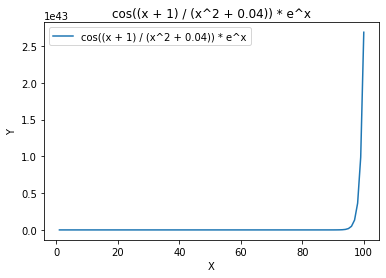

method                                                                     value                                              scipy value    realtive error
-----------------------  -------------------------------------------------------  -------------------------------------------------------  ----------------
Rectangular integration  25812655286343834297625067126473332130578432.0000000000  26879771799944412387173650898984001815445504.0000000000      0.0396996121
Trapezoidal integration  29040136523310594911000244202413745760108544.0000000000  26879771799944412387173650898984001815445504.0000000000      0.0803713938
Simpson integration      26888482365332754502083459485120136673755136.0000000000  26879771799944412387173650898984001815445504.0000000000      0.0003240565


In [48]:
calculate(1, 100, 100)

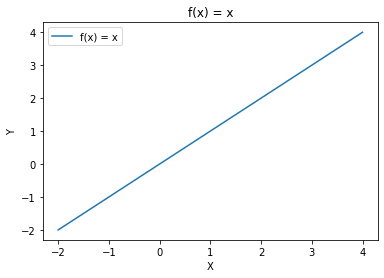

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  6.0000000000   6.0000000000      0.0000000000
Trapezoidal integration  6.0000000000   6.0000000000      0.0000000000
Simpson integration      6.0000000000   6.0000000000      0.0000000000


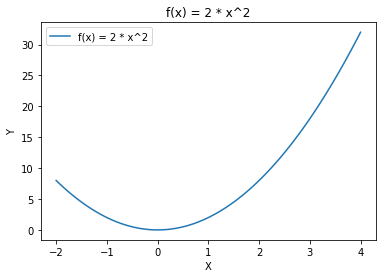

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  47.9964000000  48.0000000000      0.0000750000
Trapezoidal integration  48.0072000000  48.0000000000      0.0001500000
Simpson integration      48.0000000000  48.0000000000      0.0000000000


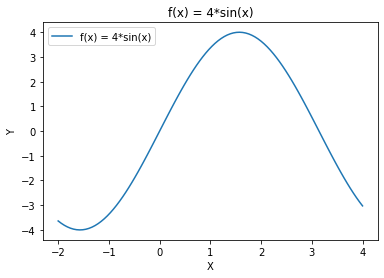

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  0.9501296503   0.9499871373      0.0001500158
Trapezoidal integration  0.9497021240   0.9499871373      0.0003000180
Simpson integration      0.9499871415   0.9499871373      0.0000000045


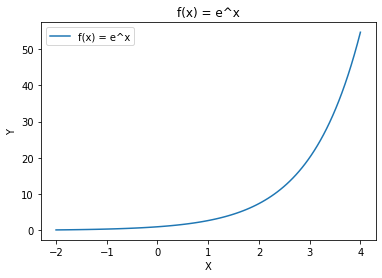

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  54.4546461854  54.4628147499      0.0001499843
Trapezoidal integration  54.4791526141  54.4628147499      0.0002999820
Simpson integration      54.4628149950  54.4628147499      0.0000000045


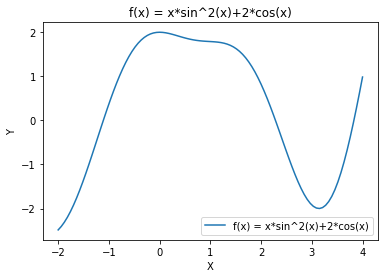

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  1.8729753320   1.8737124204      0.0003933840
Trapezoidal integration  1.8751863469   1.8737124204      0.0007866343
Simpson integration      1.8737123370   1.8737124204      0.0000000445


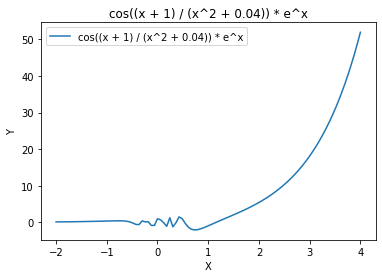

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  45.0253961008  45.0432073122      0.0003954250
Trapezoidal integration  45.0690302442  45.0432073122      0.0005732925
Simpson integration      45.0399408153  45.0432073122      0.0000725192


In [49]:
calculate(-2, 4, 100)

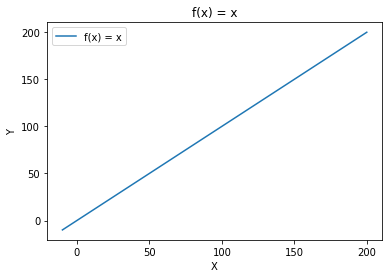

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  19950.0000000000  19950.0000000000      0.0000000000
Trapezoidal integration  19950.0000000000  19950.0000000000      0.0000000000
Simpson integration      19950.0000000000  19950.0000000000      0.0000000000


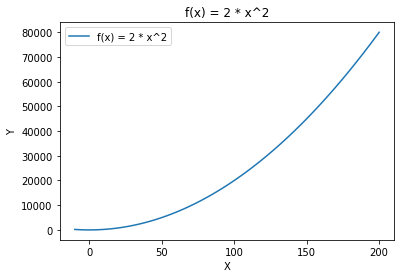

method                                value         scipy value    realtive error
-----------------------  ------------------  ------------------  ----------------
Rectangular integration  5333845.6500000022  5333999.9999999991      0.0000289370
Trapezoidal integration  5334308.7000000011  5333999.9999999991      0.0000578740
Simpson integration      5334000.0000000000  5333999.9999999991      0.0000000000


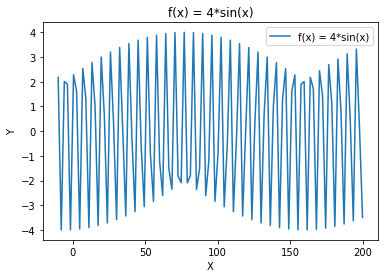

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  -6.4216503464  -5.3050368163      0.2104817683
Trapezoidal integration  -3.1952272921  -5.3050368163      0.3976993181
Simpson integration      -5.3461759950  -5.3050368163      0.0077547395


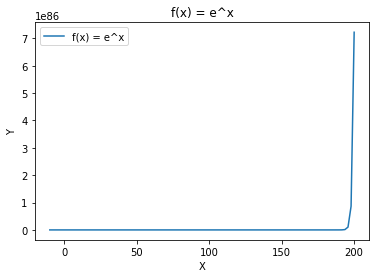

method                                                                                                                value                                                                                         scipy value    realtive error
-----------------------  --------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------  ----------------
Rectangular integration  605114807016636759979984396077305771968997418498174567265194433326848059393782637920256.0000000000  722597376812575558440013490133038113036241290065248702362575225795358745817392147857408.0000000000      0.1625837203
Trapezoidal integration  970479759174434315203459275523178070547155250906355538405236767078844466842208143671296.0000000000  722597376812575558440013490133038113036241290065248702362575225795358745817392147857408.0000000000      0.3430435680
Simpson integration      7269031

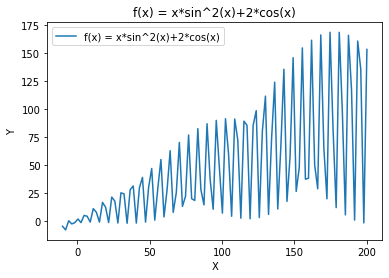

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  10080.2776653851  10017.1103665926      0.0063059402
Trapezoidal integration   9918.9259354686  10017.1103665926      0.0098016721
Simpson integration      10026.4937554129  10017.1103665926      0.0009367361


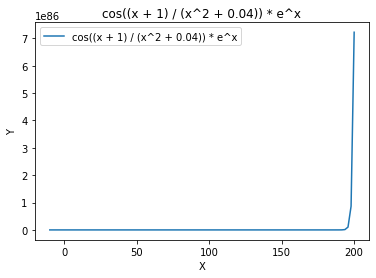

method                                                                                                                value                                                                                         scipy value    realtive error
-----------------------  --------------------------------------------------------------------------------------------------  --------------------------------------------------------------------------------------------------  ----------------
Rectangular integration  605107062691495979226862823856542192520590506179458734674879203810080602746439759560704.0000000000  722588160738458694627103124097041858278146339173778586147507355845590502758460239642624.0000000000      0.1625837572
Trapezoidal integration  970467440989728673804584762031345062060315728480189694432101703029461800179777759346688.0000000000  722588160738458694627103124097041858278146339173778586147507355845590502758460239642624.0000000000      0.3430436502
Simpson integration      7268938

In [52]:
calculate(-10, 200, 100)

#### Różne ilości podziałów dla przedziału [1, 10]

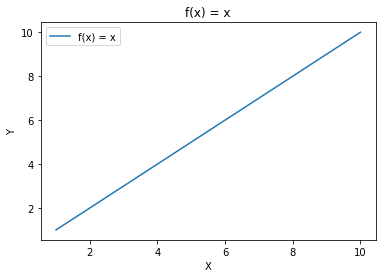

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  49.5000000000  49.5000000000      0.0000000000
Trapezoidal integration  49.5000000000  49.5000000000      0.0000000000
Simpson integration      49.5000000000  49.5000000000      0.0000000000


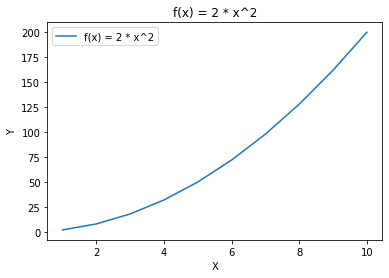

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  664.7850000000  666.0000000000      0.0018243243
Trapezoidal integration  668.4300000000  666.0000000000      0.0036486486
Simpson integration      666.0000000000  666.0000000000      0.0000000000


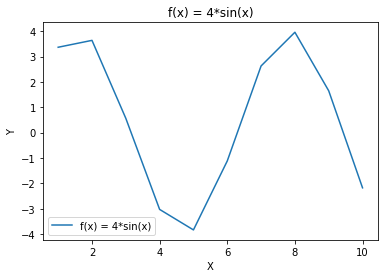

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  5.7082060719   5.5174953398      0.0345647292
Trapezoidal integration  5.1399376171   5.5174953398      0.0684291874
Simpson integration      5.5187832537   5.5174953398      0.0002334236


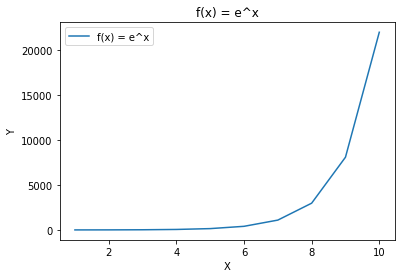

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  21297.6391990875  22023.7475129783      0.0329693352
Trapezoidal integration  23490.6606972618  22023.7475129783      0.0666059754
Simpson integration      22028.6463651456  22023.7475129783      0.0002224350


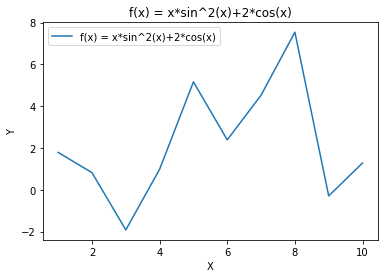

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  19.4375673199  19.8209484262      0.0193422180
Trapezoidal integration  20.5649258721  19.8209484262      0.0375349065
Simpson integration      19.8133535040  19.8209484262      0.0003831765


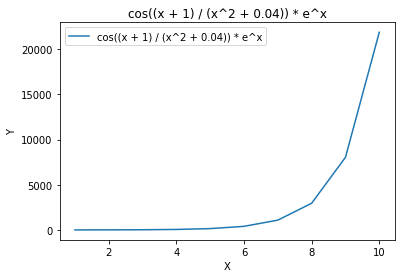

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  21117.8486130376  21840.3789116024      0.0330823152
Trapezoidal integration  23300.0937891159  21840.3789116024      0.0668356022
Simpson integration      21845.2636717304  21840.3789116024      0.0002236573


In [53]:
calculate(1, 10, 10)

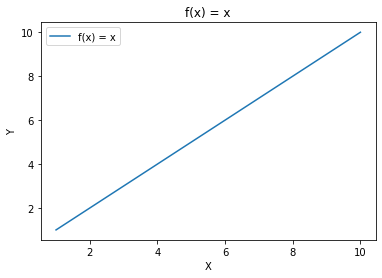

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  49.5000000000  49.5000000000      0.0000000000
Trapezoidal integration  49.5000000000  49.5000000000      0.0000000000
Simpson integration      49.5000000000  49.5000000000      0.0000000000


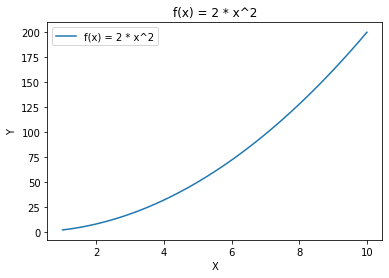

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  665.9878500000  666.0000000000      0.0000182432
Trapezoidal integration  666.0243000000  666.0000000000      0.0000364865
Simpson integration      666.0000000000  666.0000000000      0.0000000000


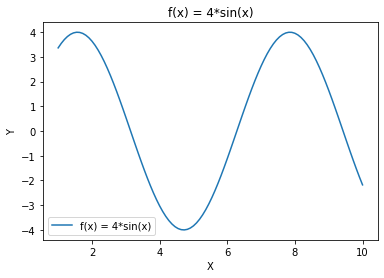

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  5.5193579345   5.5174953398      0.0003375798
Trapezoidal integration  5.5137705275   5.5174953398      0.0006750911
Simpson integration      5.5174954655   5.5174953398      0.0000000228


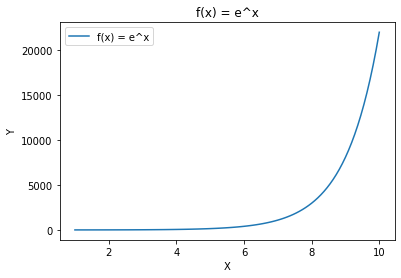

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  22016.3162538675  22023.7475129783      0.0003374203
Trapezoidal integration  22038.6115360225  22023.7475129783      0.0006749089
Simpson integration      22023.7480145858  22023.7475129783      0.0000000228


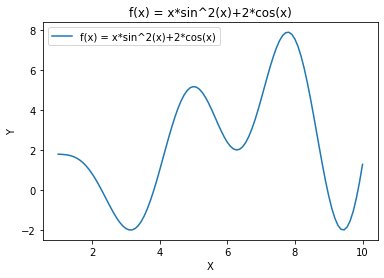

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  19.8173755553  19.8209484262      0.0001802573
Trapezoidal integration  19.8280920678  19.8209484262      0.0003604087
Simpson integration      19.8209477261  19.8209484262      0.0000000353


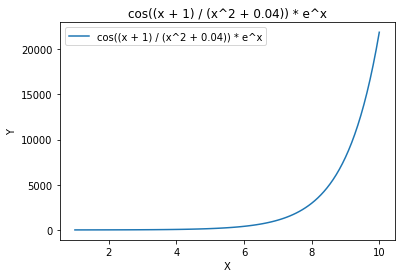

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  21832.9838900535  21840.3789116024      0.0003385940
Trapezoidal integration  21855.1704586469  21840.3789116024      0.0006772569
Simpson integration      21840.3794129179  21840.3789116024      0.0000000230


In [54]:
calculate(1, 10, 100)

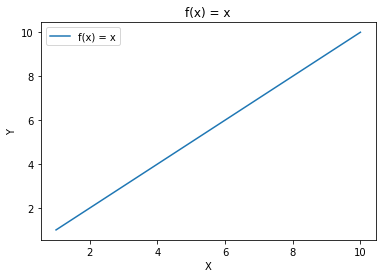

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  49.5000000000  49.5000000000      0.0000000000
Trapezoidal integration  49.5000000000  49.5000000000      0.0000000000
Simpson integration      49.5000000000  49.5000000000      0.0000000000


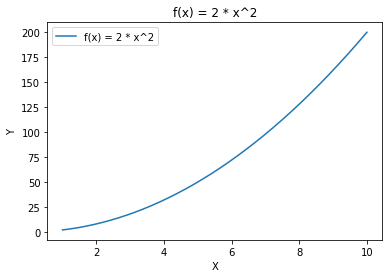

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  665.9998785000  666.0000000000      0.0000001824
Trapezoidal integration  666.0002430000  666.0000000000      0.0000003649
Simpson integration      666.0000000000  666.0000000000      0.0000000000


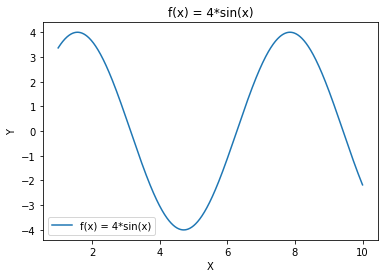

method                          value    scipy value    realtive error
-----------------------  ------------  -------------  ----------------
Rectangular integration  5.5175139614   5.5174953398      0.0000033750
Trapezoidal integration  5.5174580966   5.5174953398      0.0000067500
Simpson integration      5.5174953398   5.5174953398      0.0000000000


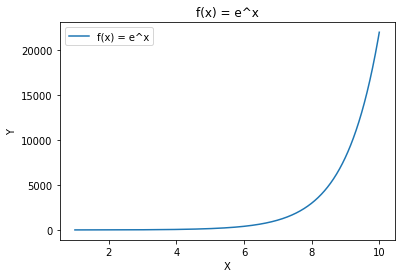

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  22023.6731830060  22023.7475129783      0.0000033750
Trapezoidal integration  22023.8961730733  22023.7475129783      0.0000067500
Simpson integration      22023.7475130284  22023.7475129783      0.0000000000


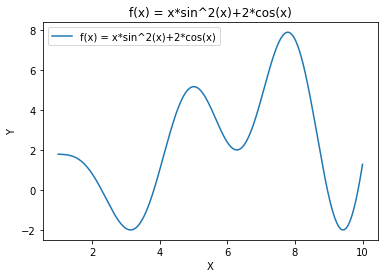

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  19.8209127217  19.8209484262      0.0000018013
Trapezoidal integration  19.8210198349  19.8209484262      0.0000036027
Simpson integration      19.8209484261  19.8209484262      0.0000000000


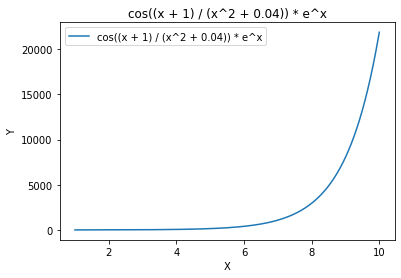

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  21840.3049440208  21840.3789116024      0.0000033867
Trapezoidal integration  21840.5268469307  21840.3789116024      0.0000067735
Simpson integration      21840.3789116574  21840.3789116024      0.0000000000


In [55]:
calculate(1, 10, 1000)

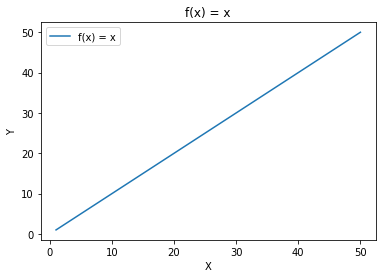

method                             value      scipy value    realtive error
-----------------------  ---------------  ---------------  ----------------
Rectangular integration  1249.5000000000  1249.5000000000      0.0000000000
Trapezoidal integration  1249.5000000000  1249.5000000000      0.0000000000
Simpson integration      1249.5000000000  1249.5000000000      0.0000000000


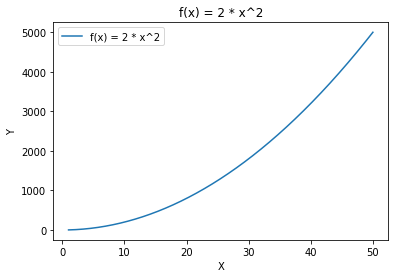

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  83332.6664705850  83332.6666666667      0.0000000024
Trapezoidal integration  83332.6670588300  83332.6666666667      0.0000000047
Simpson integration      83332.6666666666  83332.6666666667      0.0000000000


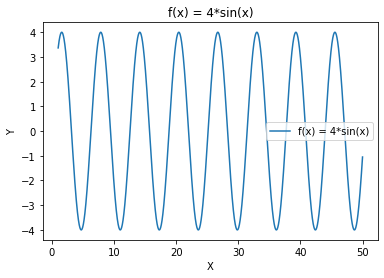

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  -1.6986565899  -1.6986548905      0.0000010004
Trapezoidal integration  -1.6986514918  -1.6986548905      0.0000020008
Simpson integration      -1.6986548905  -1.6986548905      0.0000000000


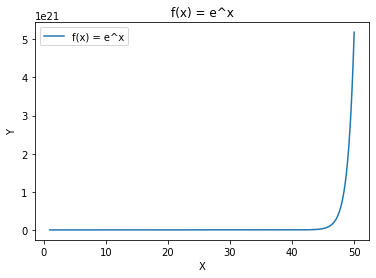

method                                               value                        scipy value    realtive error
-----------------------  ---------------------------------  ---------------------------------  ----------------
Rectangular integration  5184700341724886597632.0000000000  5184705528587075190784.0000000000      0.0000010004
Trapezoidal integration  5184715902314557210624.0000000000  5184705528587075190784.0000000000      0.0000020008
Simpson integration      5184705528588111183872.0000000000  5184705528587075190784.0000000000      0.0000000000


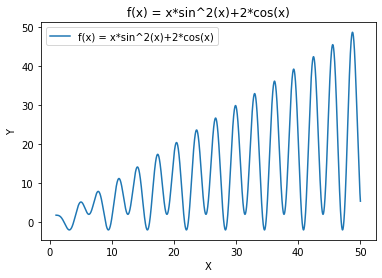

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  628.9394196494  628.9393949799      0.0000000392
Trapezoidal integration  628.9393456411  628.9393949799      0.0000000784
Simpson integration      628.9393949800  628.9393949799      0.0000000000


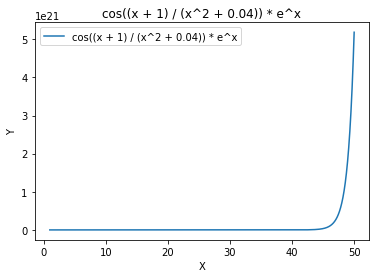

method                                               value                        scipy value    realtive error
-----------------------  ---------------------------------  ---------------------------------  ----------------
Rectangular integration  5183574652174827782144.0000000000  5183579838001820205056.0000000000      0.0000010004
Trapezoidal integration  5183590209658898350080.0000000000  5183579838001820205056.0000000000      0.0000020009
Simpson integration      5183579838002853052416.0000000000  5183579838001820205056.0000000000      0.0000000000


In [56]:
calculate(1, 50, 10000)

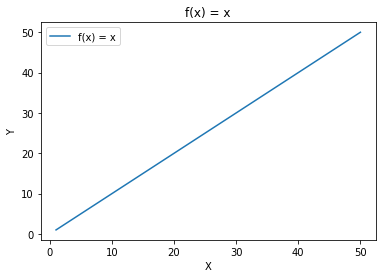

method                             value      scipy value    realtive error
-----------------------  ---------------  ---------------  ----------------
Rectangular integration  1249.5000000000  1249.5000000000      0.0000000000
Trapezoidal integration  1249.5000000000  1249.5000000000      0.0000000000
Simpson integration      1249.5000000000  1249.5000000000      0.0000000000


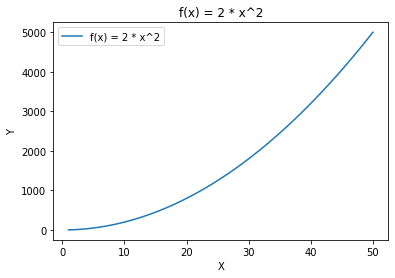

method                              value       scipy value    realtive error
-----------------------  ----------------  ----------------  ----------------
Rectangular integration  83332.6666665881  83332.6666666667      0.0000000000
Trapezoidal integration  83332.6666668222  83332.6666666667      0.0000000000
Simpson integration      83332.6666666656  83332.6666666667      0.0000000000


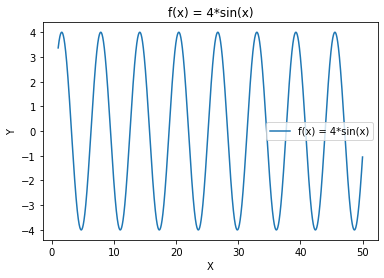

method                           value    scipy value    realtive error
-----------------------  -------------  -------------  ----------------
Rectangular integration  -1.6986548912  -1.6986548905      0.0000000004
Trapezoidal integration  -1.6986548891  -1.6986548905      0.0000000008
Simpson integration      -1.6986548905  -1.6986548905      0.0000000000


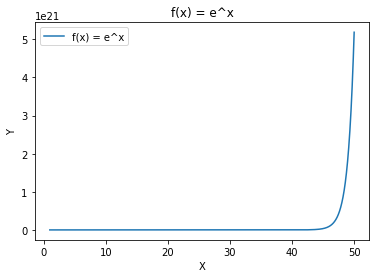

method                                               value                        scipy value    realtive error
-----------------------  ---------------------------------  ---------------------------------  ----------------
Rectangular integration  5184705526512297705472.0000000000  5184705528587075190784.0000000000      0.0000000004
Trapezoidal integration  5184705532736574586880.0000000000  5184705528587075190784.0000000000      0.0000000008
Simpson integration      5184705528587085676544.0000000000  5184705528587075190784.0000000000      0.0000000000


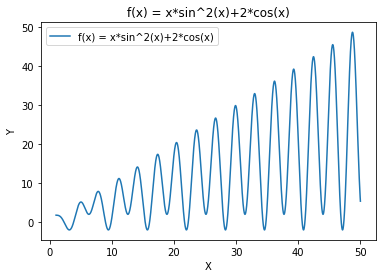

method                            value     scipy value    realtive error
-----------------------  --------------  --------------  ----------------
Rectangular integration  628.9393949898  628.9393949799      0.0000000000
Trapezoidal integration  628.9393949602  628.9393949799      0.0000000000
Simpson integration      628.9393949800  628.9393949799      0.0000000000


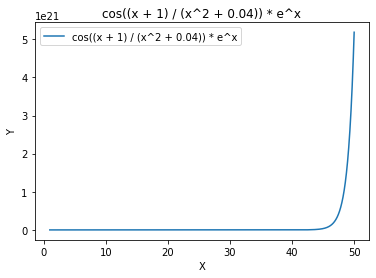

method                                               value                        scipy value    realtive error
-----------------------  ---------------------------------  ---------------------------------  ----------------
Rectangular integration  5183579835927468441600.0000000000  5183579838001820205056.0000000000      0.0000000004
Trapezoidal integration  5183579842150465011712.0000000000  5183579838001820205056.0000000000      0.0000000008
Simpson integration      5183579838001767776256.0000000000  5183579838001820205056.0000000000      0.0000000000


In [57]:
calculate(1, 50, 500000)